In [52]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf

In [53]:
# Import data
df = pd.read_csv(Path('../resources/austinHousingData.csv'))
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [54]:
df.columns
#df.dtypes
#df.isnull().sum()

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

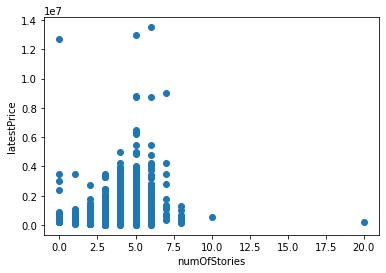

In [55]:
# Plot the data
plt.scatter(df.numOfBedrooms, df.latestPrice)
plt.xlabel('numOfStories')
plt.ylabel('latestPrice')
plt.show()

In [56]:
# Create features and target
y = df["latestPrice"]
X = df.drop(columns=['city','streetAddress','description','hasAssociation','hasCooling','hasGarage','hasHeating','hasSpa','hasView','homeType','latest_saledate','latestPriceSource','homeImage','latestPrice'])

In [57]:
# Instantiate linear regression variable
model = LinearRegression()
# Use data to learn patterns (fitting or training)
model.fit(X,y)

LinearRegression()

In [58]:
# Create prediction
y_pred = model.predict(X)
print(y_pred.shape)

(15171,)


In [68]:
print(model.coef_)

[ 9.97683970e-06 -2.88612553e+03 -5.83939649e+04  4.70981184e+05
 -1.17893193e+06  5.20836054e+04 -5.27839209e+04 -2.73883486e+03
 -8.49749416e+03  1.22218828e+03  2.21319559e+04  5.75793027e+02
  2.24189372e+04 -2.43441773e+03  2.53987068e+04  9.20712387e+03
 -1.80333976e+03  6.57787320e+05 -1.45088643e+04 -5.34716068e+04
  3.83626704e-04  8.81652908e+01  1.69836318e+05  1.94604098e+05
 -5.09652819e+04 -1.38197813e+05 -3.31275288e+03  5.75375062e+04
 -1.31383919e+02 -7.73763653e+03  2.00966299e+05 -3.20002591e+04
 -8.50739720e+04]


In [60]:
# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=72)

In [61]:
# Instantiate StandardScaler instances
scaler = StandardScaler()

# Fit StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [62]:
# Define the model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='relu'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                680       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
# Train the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    verbose=0)

In [65]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

119/119 - 0s - loss: -7.8861e+06 - accuracy: 0.0000e+00
Loss: -7886074.5, Accuracy: 0.0
